# Day-31 Hierachical Clustering

Today, we will explore Hierarchical Clustering, another powerful unsupervised learning technique. Unlike K-Means, you don't need to specify the number of clusters (k) beforehand. Instead, Hierarchical Clustering builds a tree-like structure called a dendrogram that shows the relationships between data points and how they are grouped.

## Topics Covered:

- What is Hierarchical Clustering? and The Two Types of Hierarchical Clustering

- Understanding the Dendrogram

- Linkage Methods (Ward, Average, Complete)

- Pros and Cons of Hierarchical Clustering

## What is Hierarchical Clustering? and The Two Types of Hierarchical Clustering

Hierarchical clustering creates a hierarchy of clusters, represented by a dendrogram. There are two main approaches:

1. Agglomerative (Bottom-Up)

- This is the most common approach. It starts by treating each data point as its own individual cluster.

- In each step, it merges the two closest clusters together until all data points belong to a single, large cluster.

- The process is "bottom-up" because you start with the individual elements and build up a hierarchy.

2. Divisive (Top-Down)

- This approach is the reverse of agglomerative.

- It starts with all data points in one single cluster.

- In each step, it splits the cluster into smaller clusters until each data point is in its own cluster.

- The choice of which two clusters to merge (or which cluster to split) is determined by a linkage method.

### `Analogy` Imagine you have a large, unsorted collection of books and you want to organize them.

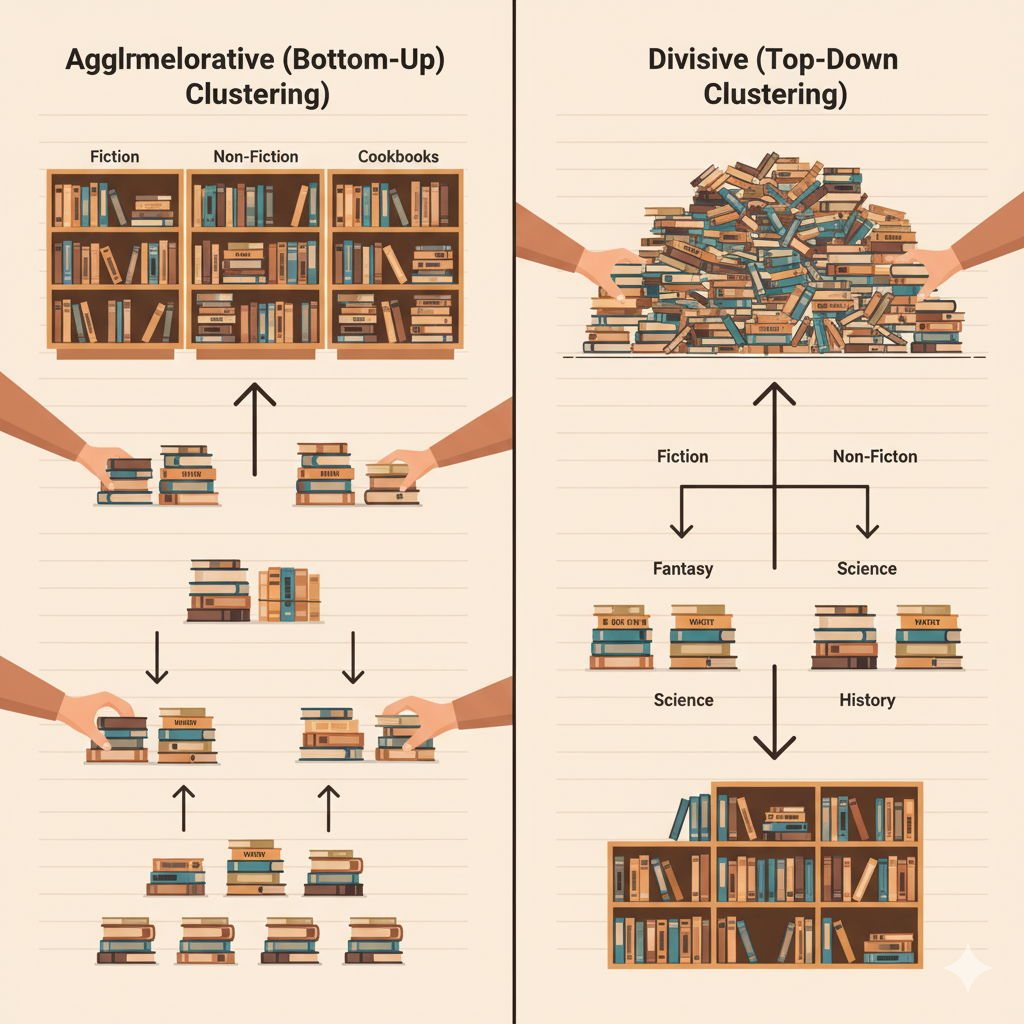

### Agglomerative (Bottom-Up):

 This is like starting with every single book as its own individual pile. You then find the two books that are most similar (e.g., they are part of the same series or by the same author) and you put them in a new, small pile. You continue this process, always finding the two closest piles and merging them. Eventually, all the small piles of similar books are merged into larger and larger groups, until your entire collection is organized into a few big categories like "Fiction," "Non-Fiction," and "Cookbooks." You built the organizational structure from the bottom up, starting with the individual books.


### Divisive (Top-Down): 


This is the reverse. You start with one giant pile that is your entire collection. Your first step is to split that pile into the two most distinct groups—maybe "Fiction" and "Non-Fiction." Next, you take the "Fiction" pile and split it into its most distinct sub-groups, perhaps "Fantasy" and "Mystery." You continue this splitting process until each individual book is in its own final category. Here, you started with the whole and broke it down into smaller and smaller pieces.

## Understanding the Dendrogram

A **dendrogram** is a tree diagram that visualizes the hierarchy of clusters. It's a key output of hierarchical clustering.

- The **x-axis** represents the **individual data points**.

- The **y-axis** represents the **dissimilarity** or **distance** between clusters.

- The vertical lines in the dendrogram indicate where clusters have been merged. The height of the line tells you how similar (or dissimilar) the clusters were when they were joined. A shorter line means the clusters were very similar and a taller line means they were more different.

You can "cut" the dendrogram at any desired height to form a specific number of clusters.

##  Linkage Methods

The "linkage method" determines how the distance between clusters is calculated. The most common methods are:

- **Ward's Method**: It minimizes the variance of the clusters being merged. This method is often the default and creates clusters of similar sizes.

- **Complete Linkage**: It uses the maximum distance between any two data points in the two clusters being merged. This method tends to produce more compact, tightly-knit clusters.

- **Average Linkage**: It uses the average distance between all data points in the two clusters being merged.

## Summary

Today, we've covered the basics of Hierarchical Clustering, understanding its two main approaches, how to interpret a dendrogram, and the role of different linkage methods. You now know how this technique differs from K-Means and how to get a comprehensive view of your data's structure.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [19]:
data = {
    'ratings': [4.2, 4.2, 4.2, 4.0, 4.1, 3.8, 4.5, 3.5, 4.9, 4.0, 3.1, 2.8, 4.7,1.0, 5.0, 4.3],
    'no_of_ratings': ['2,255', '2,948', '1,206', '10000', '630', '1,500', '19', '1,000', '5000', '120', '5', '85', '750',   '10', '10000', '300'],
    'price': [300, 250, 400, 150, 200, 350, 500, 100, 450, 275, 600, 700, 325, 800, 1200, 220] }
df = pd.DataFrame(data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ratings        16 non-null     float64
 1   no_of_ratings  16 non-null     object 
 2   price          16 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


In [20]:
df.dropna(inplace=True)

In [21]:
df.head()

,ratings,no_of_ratings,price
0,4.2,"2,255",300
1,4.2,"2,948",250
2,4.2,"1,206",400
3,4.0,10000,150
4,4.1,630,200


In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '', regex=False)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce').fillna(0)

df['ratings'] = df['ratings'].astype(str).str.replace(',', '', regex=False)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').fillna(0)


In [23]:
X = df[['ratings', 'no_of_ratings', 'price']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

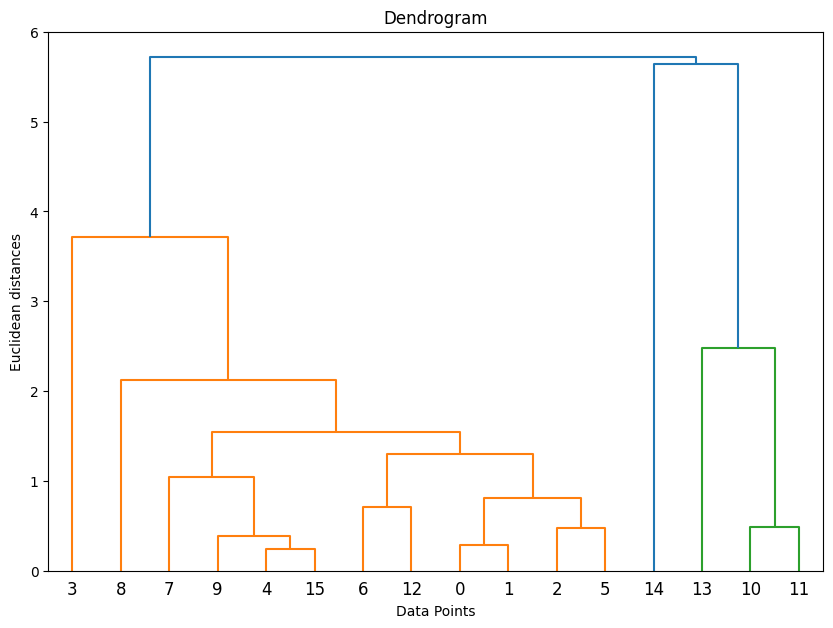

In [24]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean distances")
dendrogram(Z)
plt.show()

In [28]:
# You can also get cluster labels by "cutting" the dendrogram
from sklearn.cluster import AgglomerativeClustering

# Cutting the dendrogram at a specific distance or number of clusters
# For example, to get 4 clusters:
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
df['cluster_label'] = agg_clustering.fit_predict(X_scaled)

print(f"\nFinal clusters for a cut at {n_clusters} clusters:")
print(df)


Final clusters for a cut at 4 clusters:
    ratings  no_of_ratings  price  cluster_label
0       4.2           2255    300              1
1       4.2           2948    250              1
2       4.2           1206    400              1
3       4.0          10000    150              3
4       4.1            630    200              1
5       3.8           1500    350              1
6       4.5             19    500              1
7       3.5           1000    100              1
8       4.9           5000    450              1
9       4.0            120    275              1
10      3.1              5    600              0
11      2.8             85    700              0
12      4.7            750    325              1
13      1.0             10    800              0
14      5.0          10000   1200              2
15      4.3            300    220              1


an analysis of the four product segments identified by model:

### Cluster 0: Low-Rated, High-Priced Items
    - Ratings: These items have the lowest ratings on average, with values like 3.1, 2.8, and even 1.0.

    - No. of Ratings: They have a very low number of ratings.

    - Price: Interestingly, their prices are among the highest in the dataset ($600, $700, $800).

This cluster might represent niche or specialized products that are poorly received or products with a high-profit margin but low sales volume.

### Cluster 1: Mainstream Products
    - Ratings: This is the largest and most diverse cluster. It contains products with a wide range of ratings, mostly in the 4.0+ range.

    - No. of Ratings: The number of ratings varies from a low of 19 to a high of almost 3,000, making this a broad group.

    - Price: The prices are also very varied, but they tend to be in the average range ($100 to $500).

This cluster likely represents the bulk of your catalog—standard products with a mix of popularity and performance.

### Cluster 2: Premium, Highly-Rated Products
    - Ratings: This cluster contains a single product with a perfect 5.0 rating.

    - No. of Ratings: It has a very high number of ratings (10,000).

    - Price: This product is the most expensive in the dataset at $1200.

This cluster represents your "premium" or "best-in-class" products. These are highly popular and well-received items that command a high price.

### Cluster 3: Popular, High-Volume Products
    - Ratings: This cluster contains a single product with a solid 4.0 rating.

    - No. of Ratings: It has the highest number of ratings in the dataset (10,000), tying with Cluster 2.

    - Price: The price is very low at $150.

This cluster represents "high-volume" or "bargain" items. These products are extremely popular and have a high number of reviews, but they are offered at a very competitive, low price.

## Summary

## Whats next:

Day 32: We will explore DBSCAN, a density-based clustering algorithm that can find clusters of arbitrary shapes and identify outliers.